In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [129]:
#importing data
#since index will act as Day count, we will start index from 1
df = pd.read_csv("WHO-COVID-19-global-data.csv")
df.index+=1
df

,Date_reported,Country,Cumulative_cases
1,1/3/2020,Afghanistan,0
2,1/4/2020,Afghanistan,0
3,1/5/2020,Afghanistan,0
4,1/6/2020,Afghanistan,0
5,1/7/2020,Afghanistan,0
...,...,...,...
148595,9/16/2021,Zimbabwe,127083
148596,9/17/2021,Zimbabwe,127368
148597,9/18/2021,Zimbabwe,127632
148598,9/19/2021,Zimbabwe,127739


In [130]:
tur = df[df['Country'] == 'Turkey']
tur=tur.reset_index()
tur.index +=1

In [131]:
tur_start =tur[tur['Date_reported']=='2020-03-18']
tur_start

,index,Date_reported,Country,Cumulative_cases


### Germany Original Wave 1 : 70- 207
### After considering start as 50 cases:
### Germany Wave 1 : 76 - 207
### Split as:
### 76-104
### 105-207

In [132]:
tur_new = tur[75:626]

tur_new = tur_new.reset_index()
tur_new.index +=1
tur_new

,level_0,index,Date_reported,Country,Cumulative_cases
1,76,136762,3/18/2020,Turkey,98
2,77,136763,3/19/2020,Turkey,191
3,78,136764,3/20/2020,Turkey,359
4,79,136765,3/21/2020,Turkey,670
5,80,136766,3/22/2020,Turkey,947
...,...,...,...,...,...
547,622,137308,9/15/2021,Turkey,6710666
548,623,137309,9/16/2021,Turkey,6738890
549,624,137310,9/17/2021,Turkey,6767008
550,625,137311,9/18/2021,Turkey,6794700


In [133]:
tur_pop = 84340000
tur_norm_case = tur_new['Cumulative_cases']/tur_pop

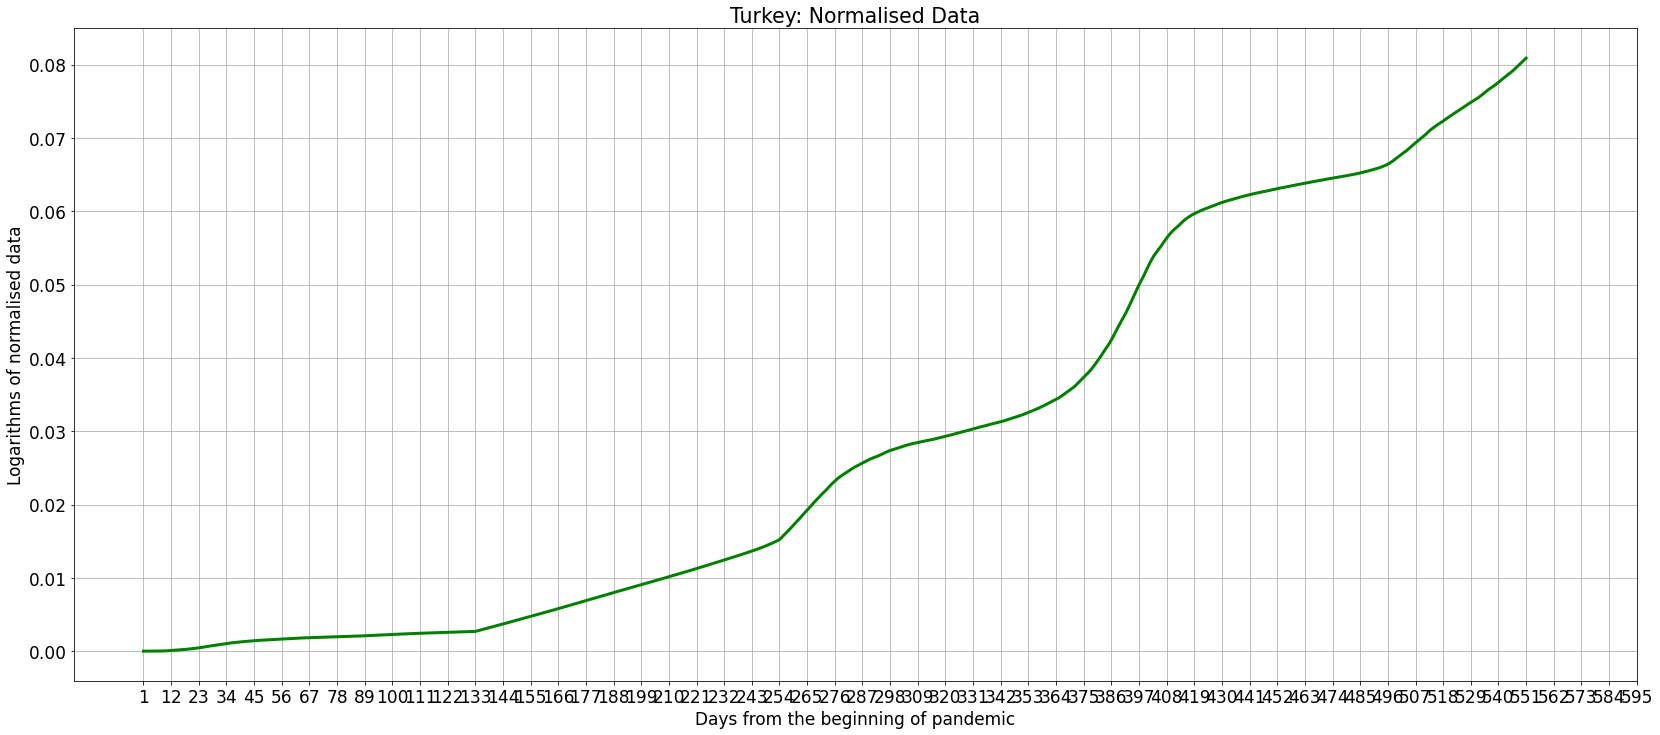

In [134]:
x1 = tur_new.index
y1 = tur_norm_case

plt.plot(x1,y1,color="green",linewidth =3.0)
plt.xticks(np.arange(1,600,11))
#plt.yticks(np.arange(-14,0,0.5))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Logarithms of normalised data')
plt.title('Turkey: Normalised Data')


plt.rcParams['figure.figsize'] = [30,15]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

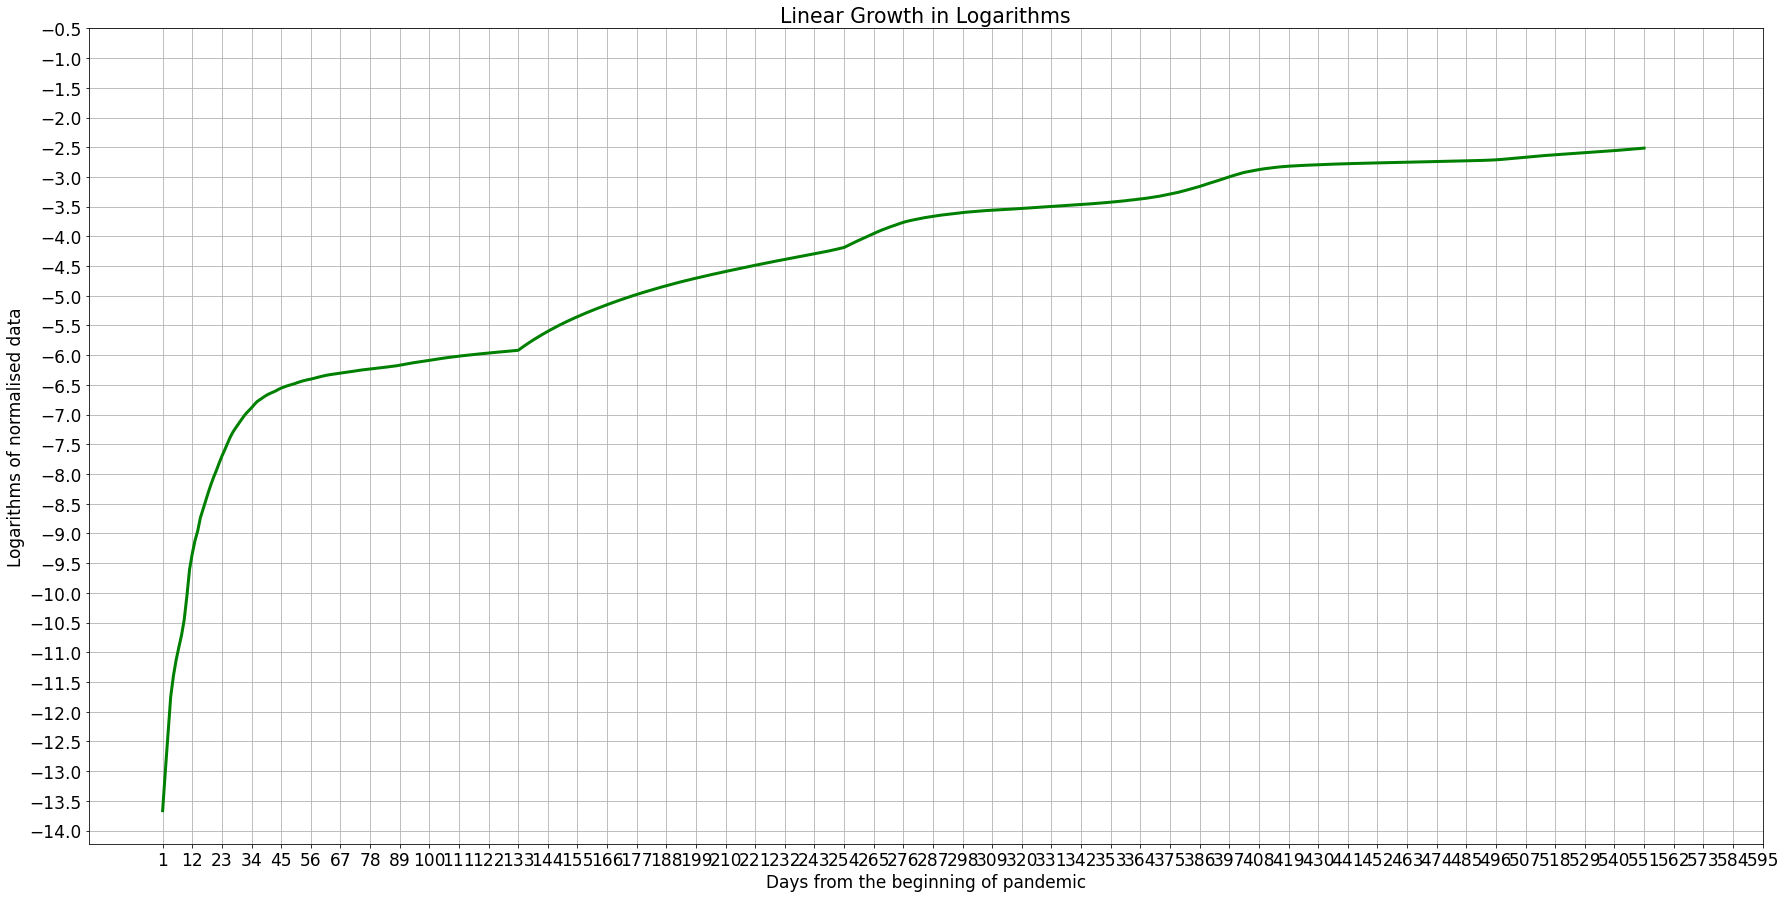

In [135]:
x1 = tur_new.index
y1 = np.log(tur_norm_case)

plt.plot(x1,y1,color="green",linewidth =3.0)
plt.xticks(np.arange(1,600,11))
plt.yticks(np.arange(-14,0,0.5))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Logarithms of normalised data')
plt.title('Linear Growth in Logarithms')


plt.rcParams['figure.figsize'] = [30,15]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [136]:
#10 days before start or epidemic would be 48th day in original data

day_10 = tur['Cumulative_cases'][66]
R0 = day_10 / tur_pop
print(R0)
I0 = tur['Cumulative_cases'][1] - R0
print(I0)
S0 = 1- I0 - R0
print(S0)

0.0
0.0
1.0


### Interval 1 : 1-29
### Interval 2 : 29 - 132
### Interval 3 : 1-132
### Interval 4: 1-551

In [137]:
x = tur_new.index.values
y= np.log(tur_norm_case)
x_int1 = x[:29]
y_int1 = y[:29]
x_int2 = x[29:132]
y_int2 = y[29:132]
x_int3 = x[:132]
y_int3 = y[:132]
x_int4 = x[:551]
y_int4 = y[:551]


curve1 = np.polyfit(x_int1,y_int1,1)
r1= curve1[0]
c1= curve1[1]
print(r1,c1)


curve2 = np.polyfit(x_int2,y_int2,1)
r2= curve2[0]
c2= curve2[1]
print(r2,c2)

curve3 = np.polyfit(x_int3,y_int3,1)
r3= curve3[0]
c3= curve3[1]
print(r3,c3)

curve4 = np.polyfit(x_int4,y_int4,1)
r4= curve4[0]
c4= curve4[1]
print(r4,c4)

print(x)

0.2105025774435757 -12.480853468315196
0.008772027114461182 -6.976601031911351
0.030221445475714318 -8.947461074620643
0.010196815612099586 -7.227342429045574
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 2

In [138]:
y1 = r1*x_int1 +c1
y2 = r2*x_int2 +c2
y3 = r3*x_int3 +c3
y4 = r4*x_int4 +c4

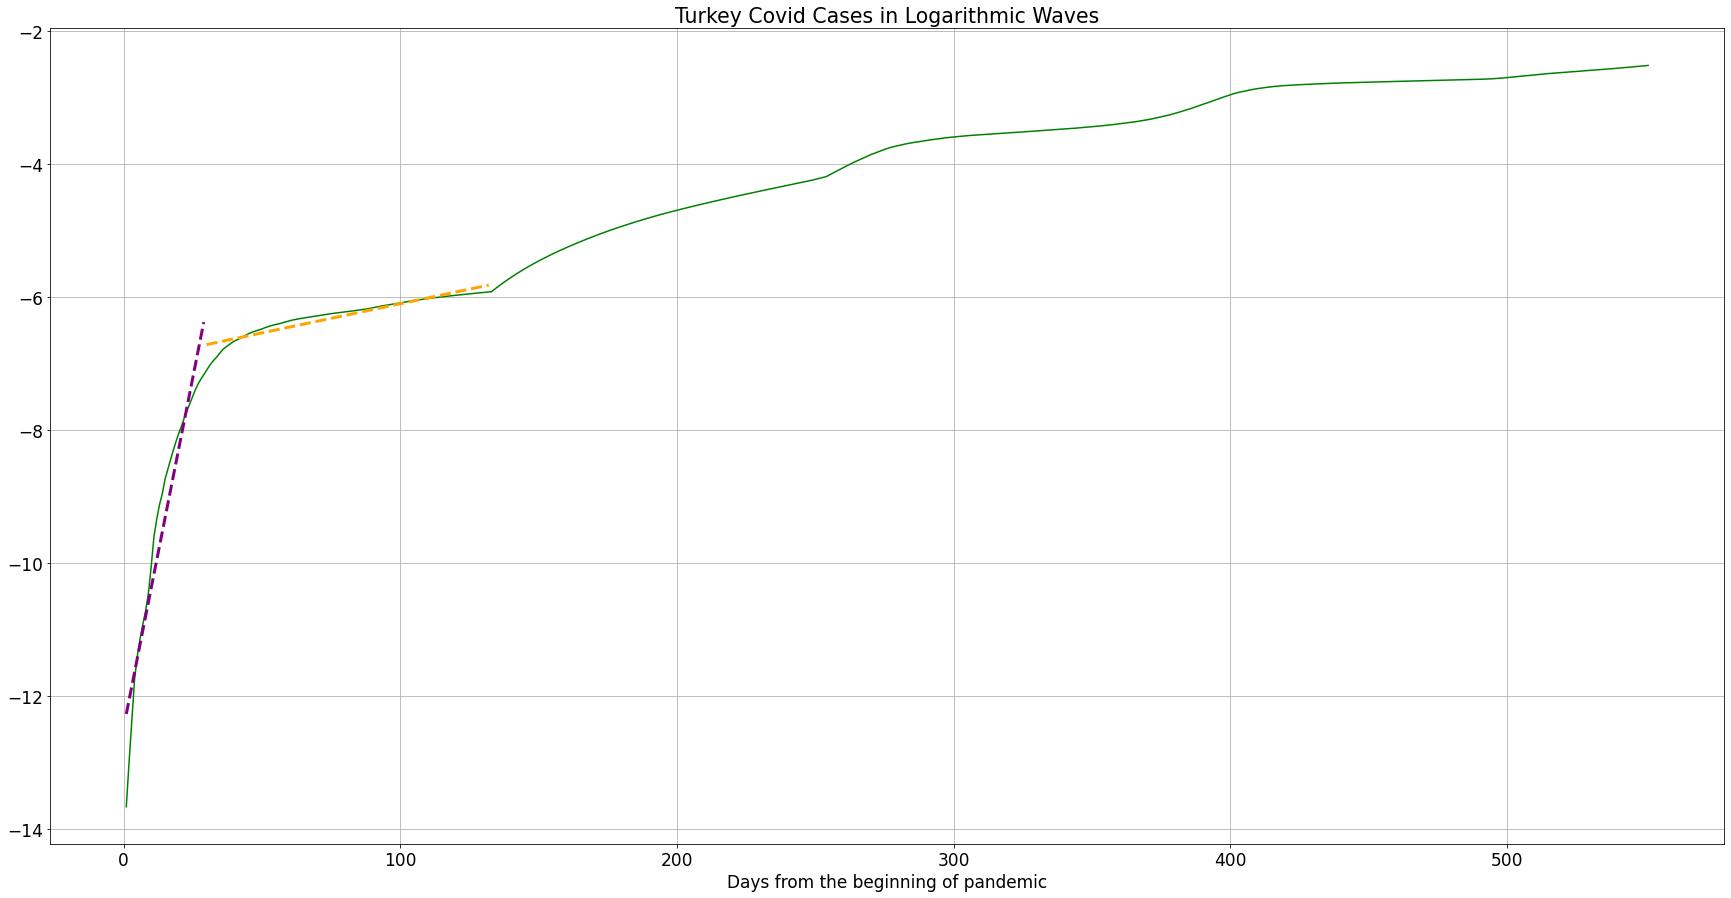

In [139]:
plt.plot(x,y,color="green")
plt.plot(x_int1,y1,color="purple",linestyle="dashed",linewidth=3.0)
plt.plot(x_int2,y2,color="orange",linestyle="dashed",linewidth=3.0)

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
#plt.xticks(np.arange(0,625,13))
#plt.yticks(np.arange(-19,1,1))
plt.title('Turkey Covid Cases in Logarithmic Waves')
plt.xlabel('Days from the beginning of pandemic')
plt.rcParams['figure.figsize'] = [28,10]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [140]:

b=0.1
a1= r1+b
print(a1)

a2= r2+b
print(a2)

a3= r3+b
print(a3)

a4= r4+b
print(a4)

0.3105025774435757
0.10877202711446118
0.13022144547571432
0.1101968156120996


In [141]:
from scipy.special import expit

obv_y = tur_norm_case[:29]
print(obv_y)

linreg = c1 + r1 * x_int1
expit(linreg)
exp_y = np.exp(linreg)
print(exp_y)

1     0.000001
2     0.000002
3     0.000004
4     0.000008
5     0.000011
6     0.000015
7     0.000018
8     0.000022
9     0.000029
10    0.000043
11    0.000068
12    0.000088
13    0.000109
14    0.000128
15    0.000160
16    0.000186
17    0.000215
18    0.000248
19    0.000284
20    0.000321
21    0.000358
22    0.000404
23    0.000453
24    0.000501
25    0.000558
26    0.000619
27    0.000675
28    0.000724
29    0.000772
Name: Cumulative_cases, dtype: float64
[4.68872020e-06 5.78727907e-06 7.14322834e-06 8.81687412e-06
 1.08826522e-05 1.34324384e-05 1.65796349e-05 2.04642141e-05
 2.52589434e-05 3.11770692e-05 3.84818015e-05 4.74980197e-05
 5.86267218e-05 7.23628592e-05 8.93173494e-05 1.10244247e-04
 1.36074279e-04 1.67956242e-04 2.07308093e-04 2.55880014e-04
 3.15832249e-04 3.89831188e-04 4.81167947e-04 5.93904747e-04
 7.33055581e-04 9.04809209e-04 1.11680441e-03 1.37846971e-03
 1.70144273e-03]


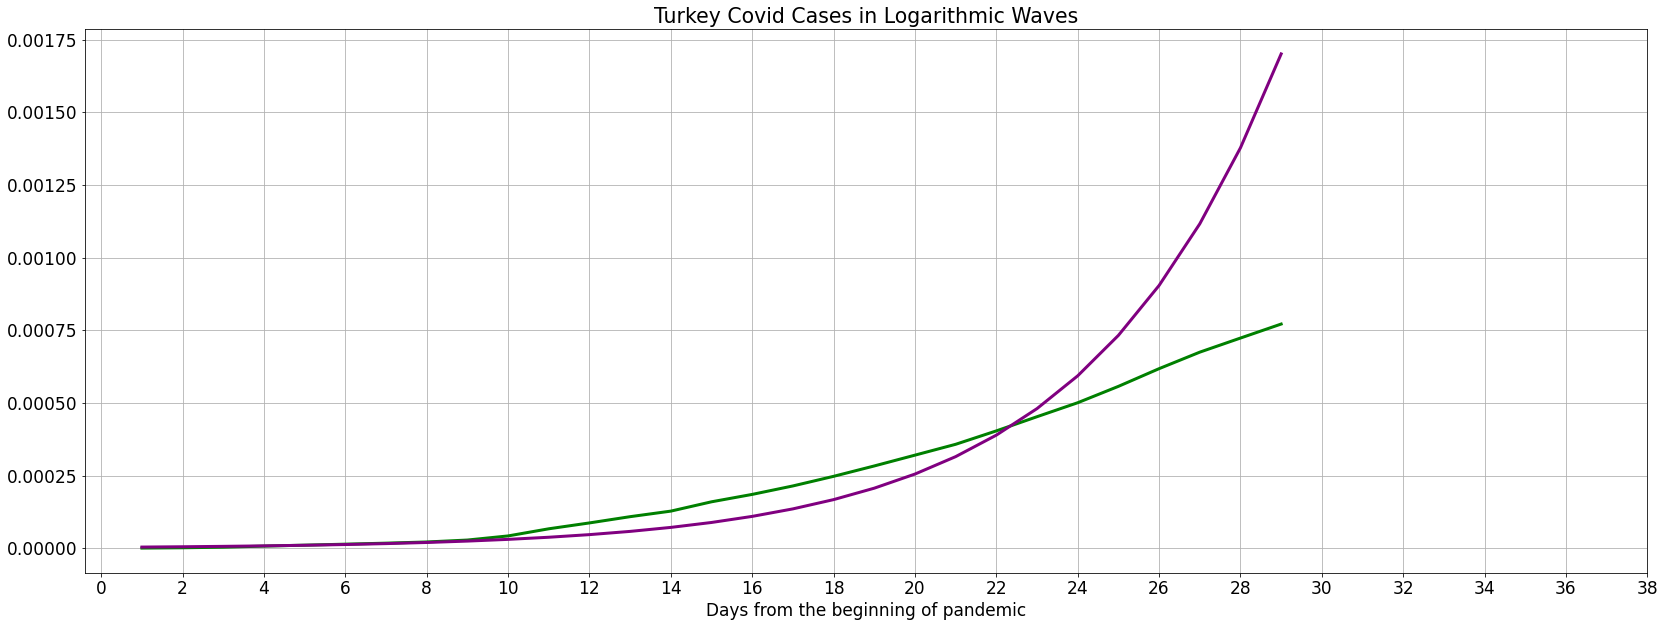

In [142]:
plt.plot(x_int1,obv_y,color="green",linewidth=3.0)
plt.plot(x_int1,exp_y,color="purple",linewidth=3.0)

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
plt.xticks(np.arange(0,40,2))
#plt.yticks(np.arange(0,0.005,0.0005))
plt.title('Turkey Covid Cases in Logarithmic Waves')
plt.xlabel('Days from the beginning of pandemic')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [143]:

day_10 = tur['Cumulative_cases'][66]
R0 = day_10 / tur_pop
print(R0)
I0 = tur_new['Cumulative_cases'][1]/tur_pop - R0
print(I0)
S0 = 1- I0 - R0
print(S0)

0.0
1.1619634811477353e-06
0.9999988380365189


In [144]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    i = 1 -y[0]-y[1]
    
    dSdt = -a1 * y[0] * i
    dRdt = b * i
    
    return [dSdt, dRdt]
inp = tur_norm_case[:29]

In [145]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [S0, R0], t_eval=x_int1)

In [146]:
p = 1 - sol.y[0, :]

MSE = np.mean(np.square(p - inp))

print(a1,MSE)


0.3105025774435757 3.652253218376612e-08


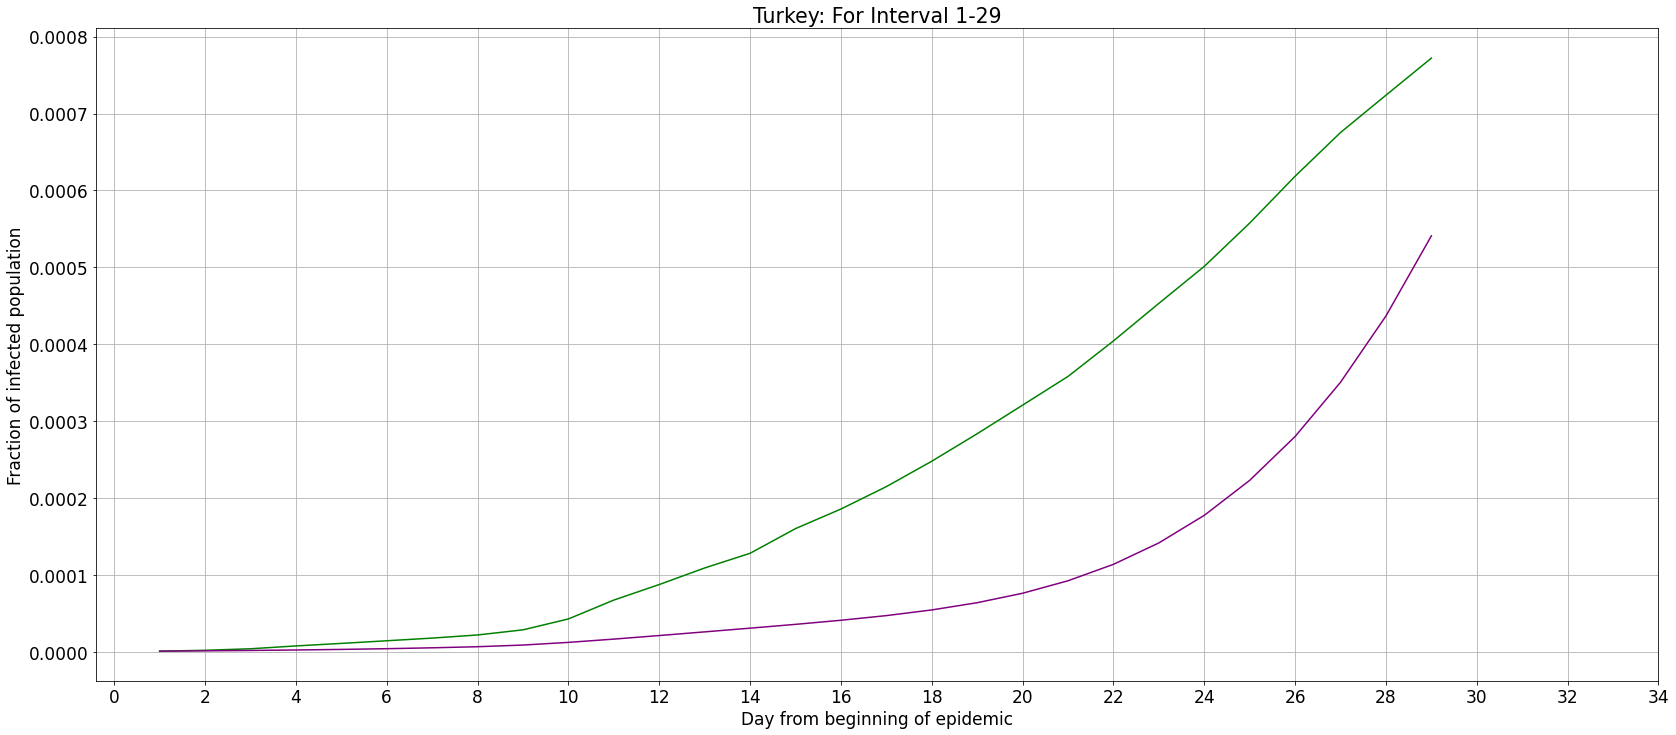

In [147]:
plt.figure()
plt.plot(x_int1, inp,color="green", label = 'Observed')
plt.plot(x_int1, p, color="purple", label = 'Predicted')
plt.xticks(np.arange(0,35,2))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Turkey: For Interval 1-29')
plt.rcParams['figure.figsize'] = [28,10]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

### Interval 2: 29 - 132

In [148]:
obv_y = tur_norm_case[29:132]

linreg = c2 + r2 * x_int2
expit(linreg)
exp_y = np.exp(linreg)

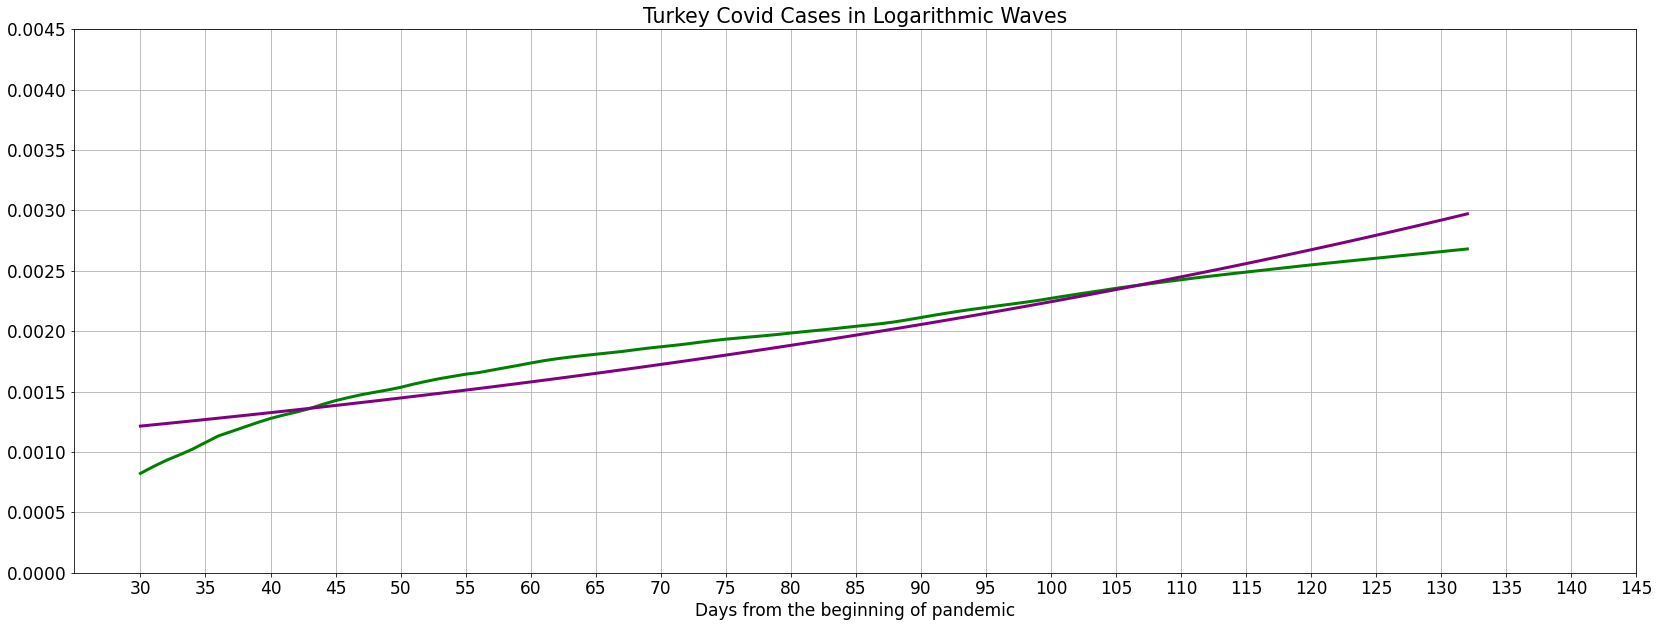

In [149]:
plt.plot(x_int2,obv_y,color="green",linewidth=3.0)
plt.plot(x_int2,exp_y,color="purple",linewidth=3.0)

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
plt.xticks(np.arange(30,150,5))
plt.yticks(np.arange(0,0.005,0.0005))
plt.title('Turkey Covid Cases in Logarithmic Waves')
plt.xlabel('Days from the beginning of pandemic')
plt.rcParams['figure.figsize'] = [28,10]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [150]:
day_10 = tur_new['Cumulative_cases'][29]
R1 = day_10 / tur_pop
print(R1)
I1 = tur_new['Cumulative_cases'][29]/tur_pop - R1
print(I0)
S1 = 1- I1 - R1
print(S1)

0.0007720061655205122
1.1619634811477353e-06
0.9992279938344795


In [151]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    i = 1 -y[0]-y[1]
    
    dSdt = -a2 * y[0] * i
    dRdt = b * i
    
    return [dSdt, dRdt]
inp = tur_norm_case[29:132]

In [152]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [S1, R1], t_eval=x_int2-29)

In [153]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))
print(p)
print(a2,MSE)

[0.00077201 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201
 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201
 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201
 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201
 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201
 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201
 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201
 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201
 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201
 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201
 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201
 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201
 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201
 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201
 0.00077201 0.00077201 0.00077201 0.00077201 0.00077201 0.0007

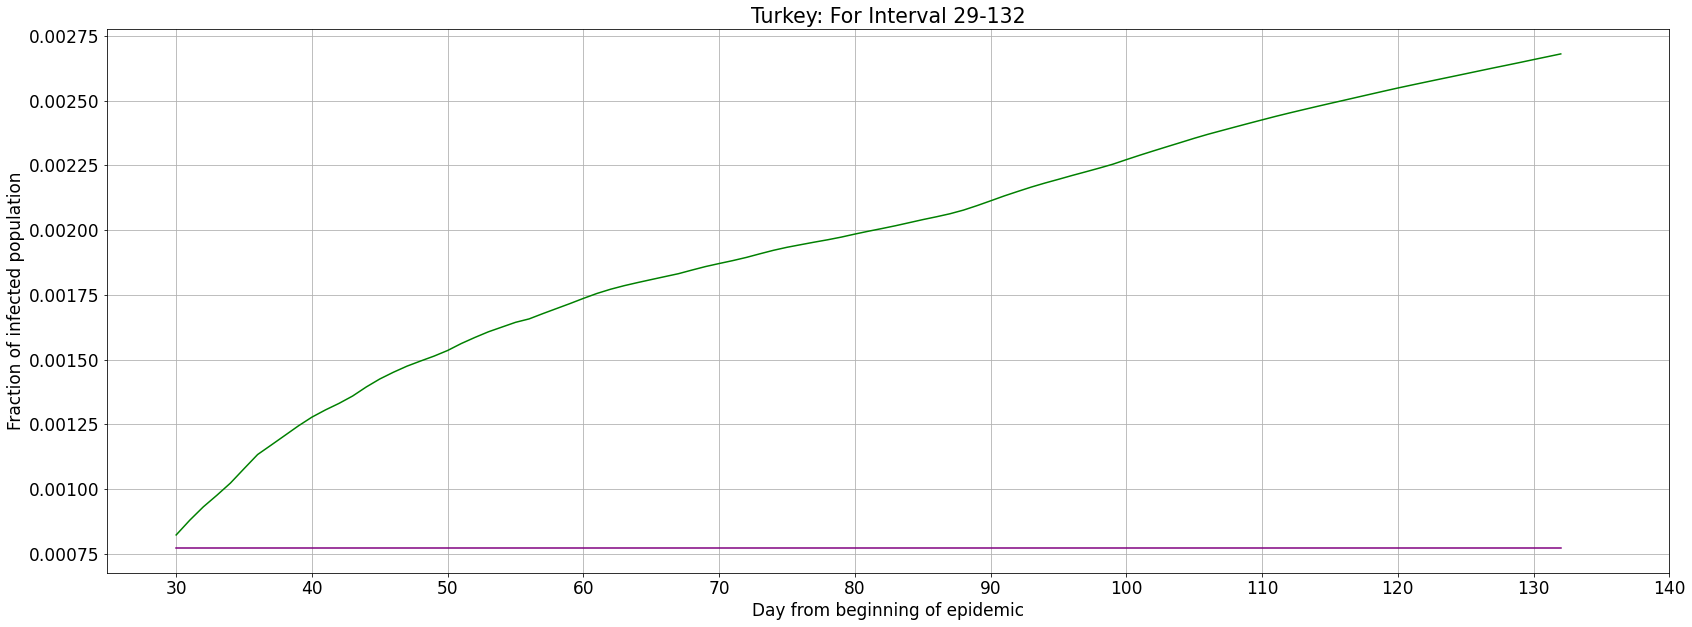

In [154]:
plt.figure()
plt.plot(x_int2, inp.values, color="green", label = 'Observed')
plt.plot(x_int2, p, color="purple", label = 'Predicted')
plt.xticks(np.arange(30,150,10))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Turkey: For Interval 29-132')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

### Interval 3: 1 - 132

In [155]:
obv_y = tur_norm_case[:132]

linreg = c3 + r3 * x_int3
expit(linreg)
exp_y = np.exp(linreg)

In [156]:
day_10 = tur['Cumulative_cases'][66]
R2 = day_10 / tur_pop
print(R2)
I2 = tur_new['Cumulative_cases'][1]/tur_pop - R2
print(I2)
S2 = 1- I2 - R2
print(S2)

0.0
1.1619634811477353e-06
0.9999988380365189


In [157]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    i = 1 -y[0]-y[1]
    
    dSdt = -a3 * y[0] * i
    dRdt = b * i
    
    return [dSdt, dRdt]
inp = tur_norm_case[:132]

In [158]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [S2, R2], t_eval=x_int3)

In [159]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))

print(a3,MSE)

0.13022144547571432 2.947121743318872e-06


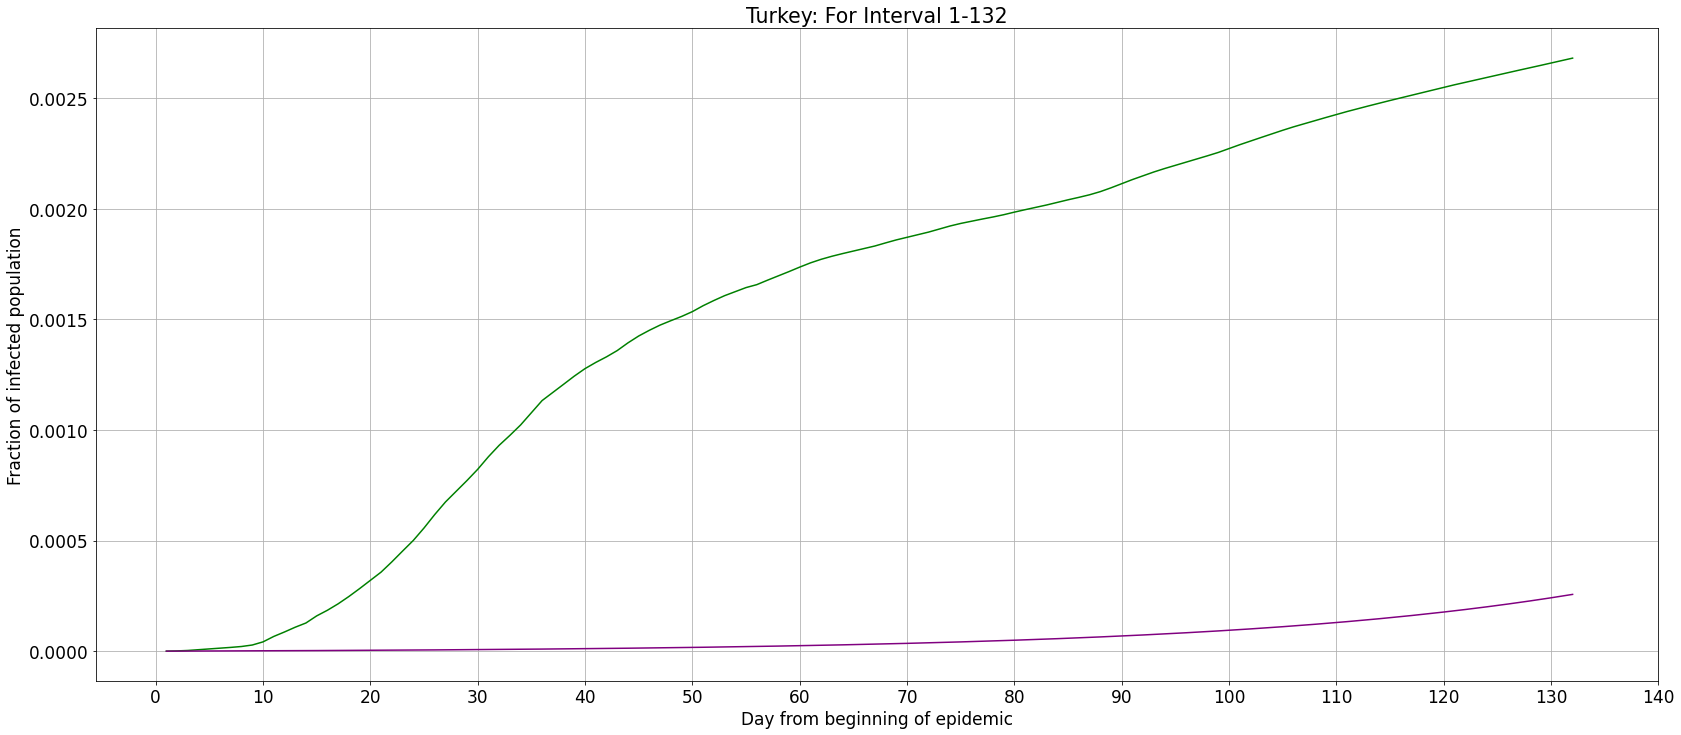

In [160]:
plt.figure()
plt.plot(x_int3, inp.values, color="green", label = 'Observed')
plt.plot(x_int3, p, color="purple", label = 'Predicted')
plt.xticks(np.arange(0,150,10))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Turkey: For Interval 1-132')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

### Interval 4: 1 - 551

In [161]:
day_10 = tur['Cumulative_cases'][66]
R3 = day_10 / tur_pop
print(R3)
I3 = tur_new['Cumulative_cases'][1]/tur_pop - R3
print(I3)
S3 = 1- I3 - R3
print(S3)

0.0
1.1619634811477353e-06
0.9999988380365189


In [162]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    i = 1 -y[0]-y[1]
    
    dSdt = -a4 * y[0] * i
    dRdt = b * i
    
    return [dSdt, dRdt]
inp = tur_norm_case[:551]

In [163]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [S3, R3], t_eval=x_int4)

In [164]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))

print(a4,MSE)

0.1101968156120996 0.001433354629321396


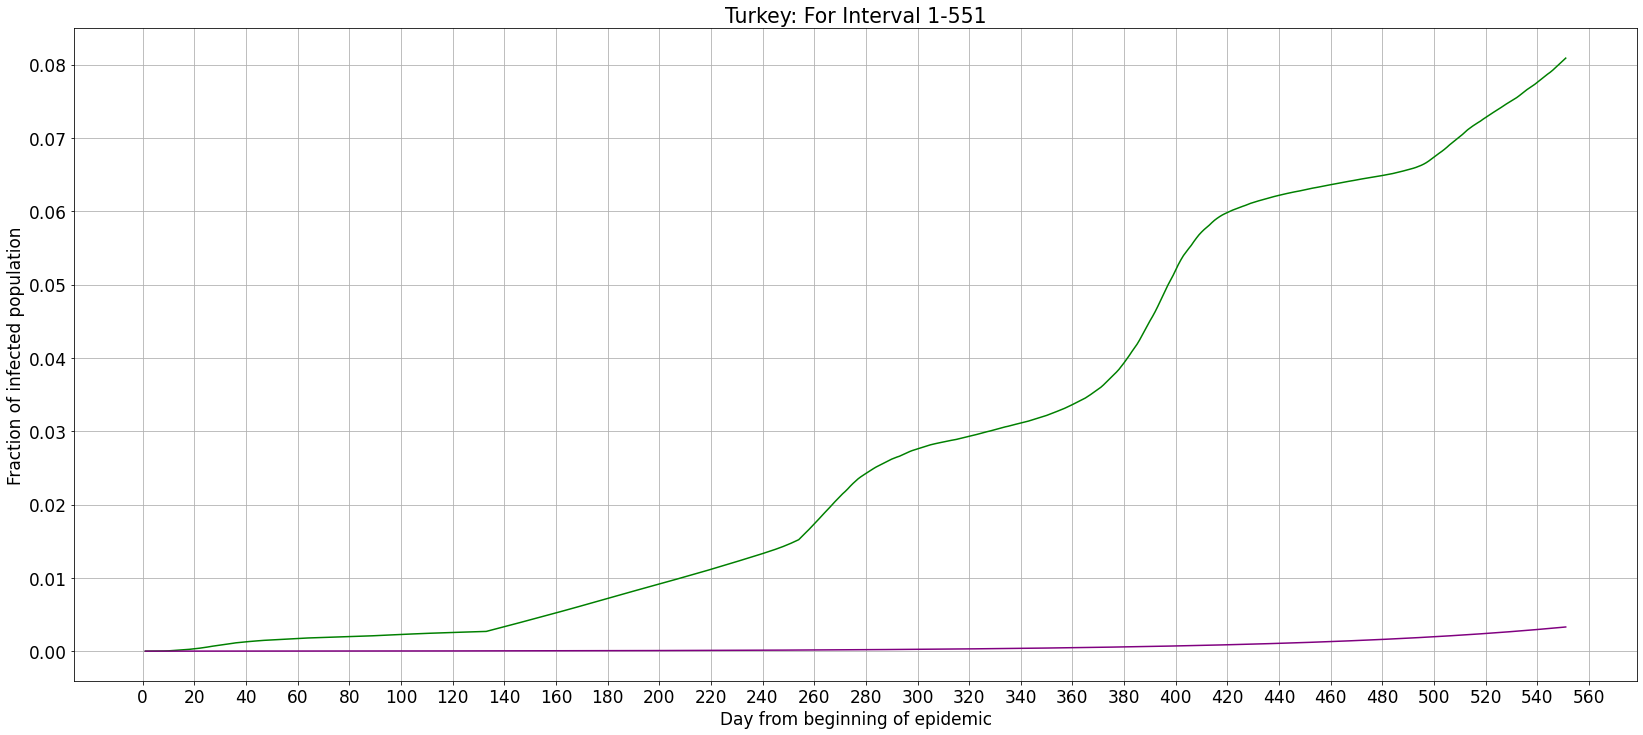

In [169]:
plt.figure()
plt.plot(x_int4, inp.values, color="green", label = 'Observed')
plt.plot(x_int4, p, color="purple", label = 'Predicted')
plt.xticks(np.arange(0,580,20))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Turkey: For Interval 1-551')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()